In [52]:
import numpy as np
import os

from osgeo import gdal
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from skimage import io

# A list of "random" colors (for a nicer output)
COLORS = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941"]

In [53]:
from sklearn import datasets
digits = datasets.load_digits()

In [54]:
iris = datasets.load_iris()
X = iris.data[:, :2]

In [55]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [56]:
y = iris.target


In [57]:
y.shape

(150,)

In [58]:
import numpy as np
from skimage import io

classes = {'vegetation': 0, 'building': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

img = io.imread('https://i.stack.imgur.com/TFOv7.png')
rows, cols, bands = img.shape

In [59]:
print rows

300


In [60]:
print cols

300


In [61]:
print bands

3


In [62]:
img.shape

(300, 300, 3)

In [63]:
from sklearn.cluster import KMeans

In [64]:
img.shape

(300, 300, 3)

In [65]:
X = img.reshape(rows*cols, bands)

In [66]:
X.shape

(90000, 3)

In [67]:
kmeans = KMeans(n_clusters=n_classes, random_state=0).fit(X)


In [68]:
unsupervised = kmeans.labels_.reshape(rows, cols)


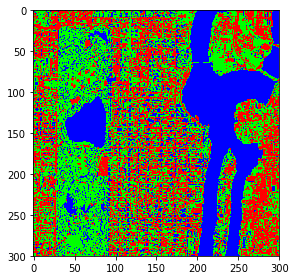

In [69]:
io.imshow(palette[unsupervised])
io.show()

In [70]:
supervised = n_classes*np.ones(shape=(rows, cols), dtype=np.int)
supervised

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

In [71]:
supervised[200:220, 150:170] = classes['building']
supervised[40:60, 40:60] = classes['vegetation']
supervised[100:120, 200:220] = classes['water']

In [72]:
y = supervised.ravel()

In [73]:
y.shape

(90000,)

In [74]:
train = np.flatnonzero(supervised < n_classes)


In [75]:
len(train)

1200

In [76]:
test = np.flatnonzero(supervised == n_classes)
test

array([    0,     1,     2, ..., 89997, 89998, 89999])

In [77]:
len(test)

88800

In [78]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X[train], y[train])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

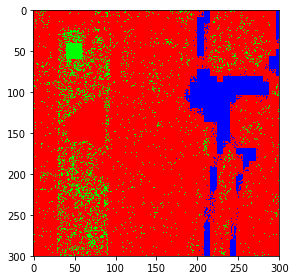

In [79]:
y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)
io.imshow(palette[supervised])
io.show()